imports:

In [3]:
from definitions import ROOT_DIR
import os
import mne
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)
import numpy as np

# Load Data

In [87]:
record_path= os.path.join(ROOT_DIR, 'data', 'p10_Record1.edf')
# record_path= os.path.join(ROOT_DIR, 'data', 'EPI_odzysk', 'JANPRZ', 'JANPRZ_EEG_DATA.edf')
raw = mne.io.read_raw_edf(record_path, preload=True)
# add montage info
montage = mne.channels.make_standard_montage("standard_1020")
raw.set_montage(montage, on_missing='warn')
# ICA is a computational intense operation
raw.crop(60, 120).load_data()
raw.notch_filter(np.array([60]), fir_design='firwin')
ch_name = ['EEG Fp1-Ref', 'EEG Fp2-Ref']

Extracting EDF parameters from D:\workspace2\eeg-epilepsy\data\p10_Record1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5401499  =      0.000 ... 10802.998 secs...
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 3301 samples (6.602 sec)



C:\Users\robbo\AppData\Local\Temp\ipykernel_18972\1030757429.py:6: RuntimeWarning: DigMontage is only a subset of info. There are 19 channel positions not present in the DigMontage. The required channels are:

['EEG Fp1-Ref', 'EEG Fp2-Ref', 'EEG F3-Ref', 'EEG F4-Ref', 'EEG C3-Ref', 'EEG C4-Ref', 'EEG P3-Ref', 'EEG P4-Ref', 'EEG O1-Ref', 'EEG O2-Ref', 'EEG F7-Ref', 'EEG F8-Ref', 'EEG T3-Ref', 'EEG T4-Ref', 'EEG T5-Ref', 'EEG T6-Ref', 'EEG Fz-Ref', 'EEG A1-Ref', 'EEG A2-Ref'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw.set_montage(montage, on_missing='warn')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s r

In [5]:
raw.compute_psd().plot();

Effective window size : 0.512 (s)


C:\Users\robbo\AppData\Local\Temp\ipykernel_18972\742018514.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot();
C:\Users\robbo\python\python3.8.9-64bits\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


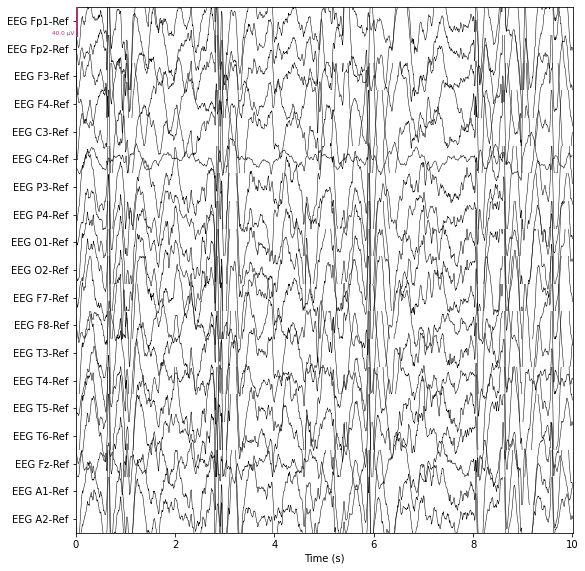

In [101]:
# pick some channels that clearly show heartbeats and blinks
raw.plot(show_scrollbars=False, duration=10);

observe how much the channels react most to EOG

In [55]:
eog_thresh = 1.1e-4

Using EOG channels: EEG Fp1-Ref, EEG Fp2-Ref
EOG channel index for this subject is: [0 1]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 108 significant peaks
Number of EOG events detected: 108
Not setting metadata
108 matching events found
No baseline correction applied
Using data from preloaded Raw for 108 events and 501 original time points ...
2 bad epochs dropped
Applying baseline correction (mode: mean)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


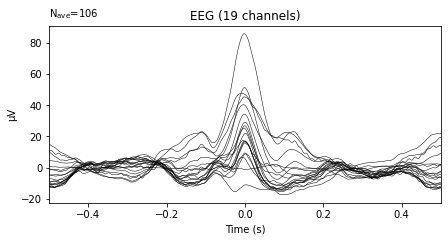

In [15]:
eog_evoked = create_eog_epochs(raw, ch_name=ch_name, thresh=5e-5).average()
eog_evoked.apply_baseline(baseline=(None, -0.2))
eog_evoked.plot();

Filtering to remove slow drifts

In [16]:
filt_raw = raw.copy().filter(l_freq=1., h_freq=None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


In [88]:
ica = ICA(n_components=15, method='picard', max_iter='auto', random_state=97)
ica.fit(filt_raw)
explained_var_ratio = ica.get_explained_variance_ratio(filt_raw)
for channel_type, ratio in explained_var_ratio.items():
    print(
        f'Fraction of {channel_type} variance explained by all components: '
        f'{ratio}'
    )

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 0.8s.
Fraction of eeg variance explained by all components: 0.9946843970807984


Creating RawArray with float64 data, n_channels=15, n_times=30001
    Range : 30000 ... 60000 =     60.000 ...   120.000 secs
Ready.


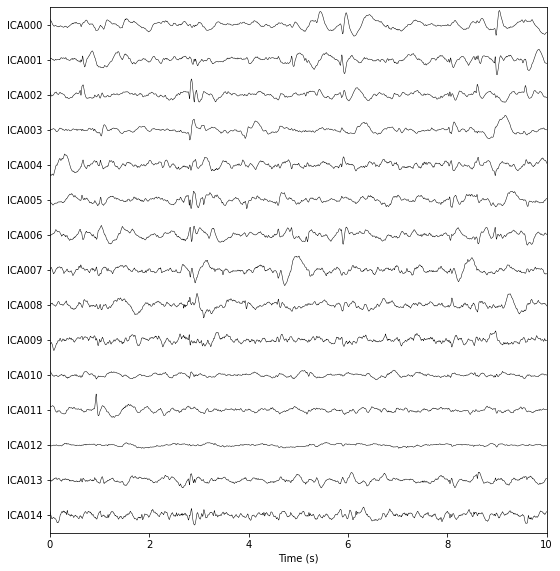

In [89]:
# raw.load_data()
ica.plot_sources(raw, show_scrollbars=False, stop=10);

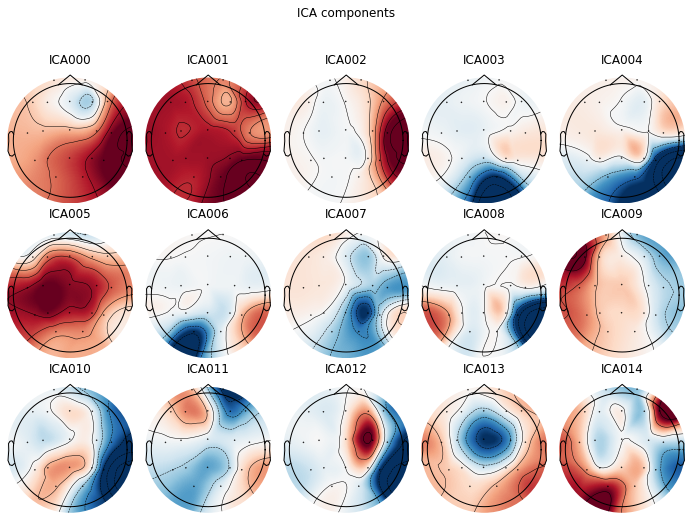

[<MNEFigure size 702x526.68 with 15 Axes>]

In [107]:
ica.plot_components()

In [131]:
new = raw.copy()
ica.apply(new, exclude=[0,1,2,5,6,7,8,9,10, 11,13,14]);

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 12 ICA components
    Projecting back using 19 PCA components


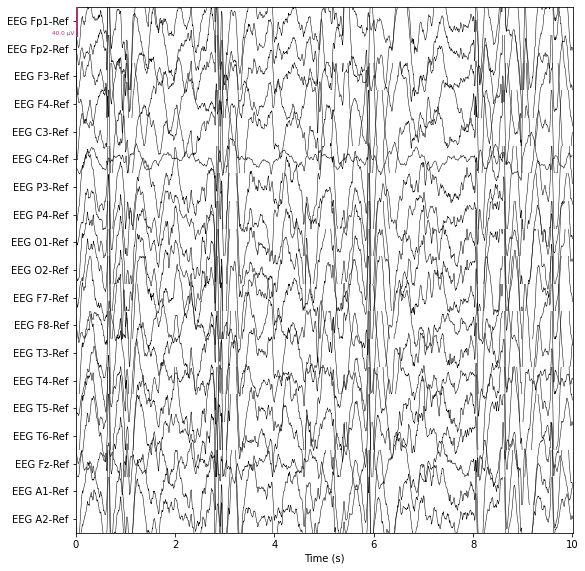

In [133]:
raw.plot(duration=10, show_scrollbars=False);

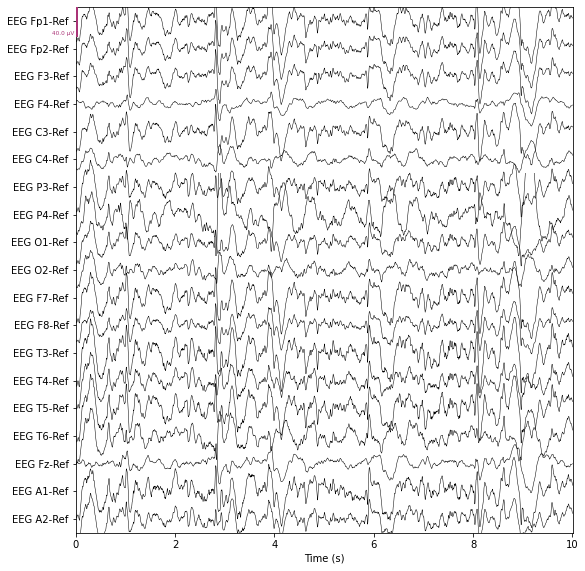

In [134]:
new.plot(duration=10, show_scrollbars =False);

1. artifact analysis
2. artifact repairing with ICA
3. feature extraction ()

graph

In [56]:
def observe_eog_noise(raw):
    eog_events = mne.preprocessing.find_eog_events(raw, ch_name=ch_name, thresh=eog_thresh)
    # 设置EOG事件的开始时间和持续时长（500ms）等
    onsets = eog_events[:, 0] / raw.info['sfreq'] - 0.25
    durations = [0.5] * len(eog_events)
    descriptions = ['bad blink'] * len(eog_events)
    blink_annot = mne.Annotations(onsets, durations, descriptions,
                                  orig_time=raw.info['meas_date'])
    raw.set_annotations(blink_annot)
    eeg_picks = mne.pick_types(raw.info, meg=False, eeg=True)
    raw.plot(duration=10, scalings='auto', show_scrollbars=False)

Using EOG channels: EEG Fp1-Ref, EEG Fp2-Ref
EOG channel index for this subject is: [0 1]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 108 significant peaks
Number of EOG events detected: 108


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


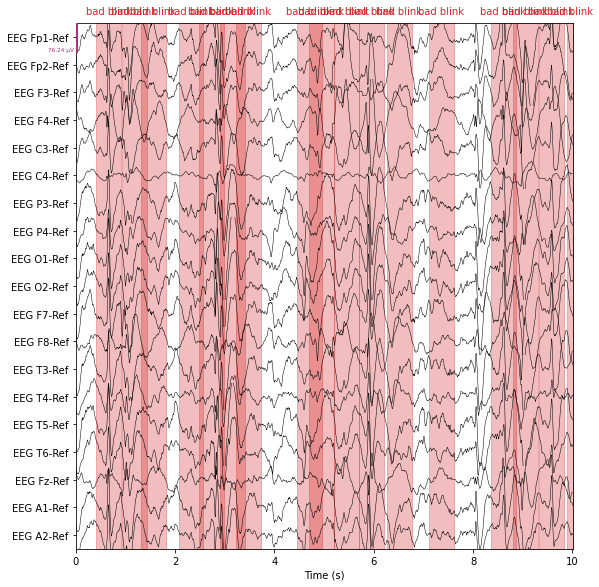

In [49]:
observe_eog_noise(new);

Using EOG channels: EEG Fp1-Ref, EEG Fp2-Ref
EOG channel index for this subject is: [0 1]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 48 significant peaks
Number of EOG events detected: 48


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


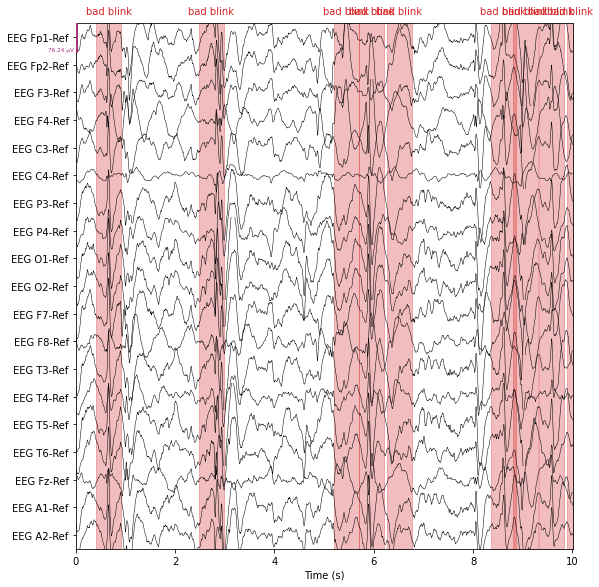

In [57]:
observe_eog_noise(raw);

# poster
1. （background, motivation）不能有大段文字
2. 流程图（*）
3. research question
4. aims & objective（结合方法和目的）